In [1]:
import geopandas

data = geopandas.read_file("/Users/volodymyrkonoplitskyi/Desktop/4 курс/2 семестр/Розробка спецдодатків для обробки та аналізу геопросторових даних/geo_data_analisis/images_data/example_dataset.geojson")

In [2]:
sowing_date_list = data['sowing_date'].tolist()
filtered_sowing_date_list = list(filter(lambda x: not '-04-' in x, sowing_date_list))
print(f'Кількість полів, які були засіяні не у квітні: {len(filtered_sowing_date_list)}')
print(filtered_sowing_date_list)

Кількість полів, які були засіяні не у квітні: 421
['2016-05-02', '2016-05-02', '2016-05-03', '2016-05-03', '2016-05-05', '2016-05-05', '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-07', '2016-05-21', '2016-05-21', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-04', '2017-05-04', '2017-05-04', '2017-05-04', '2017-05-04', '2017-05-0

In [3]:
data['relative_error'] = abs((data['actual_yield'] - data['model_yield']) / data['actual_yield'])
data.head(3)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785


In [4]:
max_relative_error = data.loc[data['relative_error'].idxmax()]
min_relative_error = data.loc[data['relative_error'].idxmin()]

print("Поле з найбільшою відносною похибкою:")
print(max_relative_error)
print("\nПоле з найменшою відносною похибкою:")
print(min_relative_error)

Поле з найбільшою відносною похибкою:
crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_405
avg_temperature                                            11.707561
avg_rainfall                                              641.750403
model_yield                                                   6262.0
geometry           MULTIPOLYGON (((29.395252000008373 48.23347100...
relative_error                                              3.174667
Name: 213, dtype: object

Поле з найменшою відносною похибкою:
crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_VN_10_0702
av

In [5]:
data['centroid'] = ''
for index, row in data.iterrows():
    centroid = row.geometry.centroid
    data.at[index, 'centroid'] = f'({centroid.x}, {centroid.y})'
data.head(3)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((28.16611 49.21513, 28.16624 49...",0.171447,"(28.163550050982856, 49.21292290278466)"
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((28.16966 49.19427, 28.16936 49...",0.115696,"(28.159578591149135, 49.20347653068863)"
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((27.30659 48.87534, 27.30674 48...",0.052785,"(27.299554944355855, 48.87374976936321)"


In [6]:
data = data.to_crs(32635)
data['area(m²)'] = data.area
data.head(3)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,centroid,area(m²)
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"(28.163550050982856, 49.21292290278466)",3.165564e+05
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((585217.656 5449710.777, 585195...",0.115696,"(28.159578591149135, 49.20347653068863)",2.142645e+06
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((522480.737 5413643.268, 522491...",0.052785,"(27.299554944355855, 48.87374976936321)",2.192922e+05


<Axes: xlabel='avg_temperature', ylabel='actual_yield'>

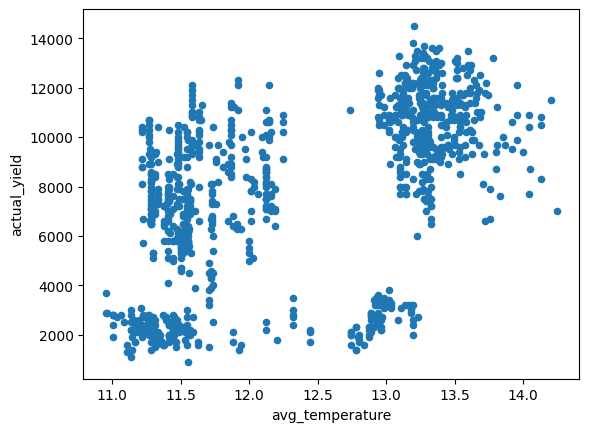

In [7]:
data.plot(x='avg_temperature', y='actual_yield', kind='scatter')

<Axes: xlabel='avg_temperature', ylabel='avg_rainfall'>

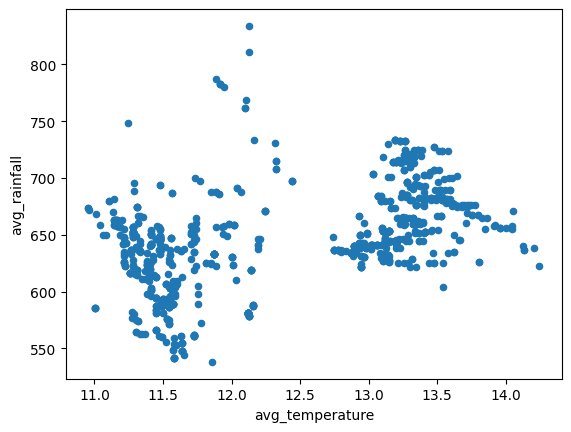

In [8]:
data.plot(x='avg_temperature', y='avg_rainfall', kind='scatter')

In [9]:
data.to_file('/Users/volodymyrkonoplitskyi/Desktop/4 курс/2 семестр/Розробка спецдодатків для обробки та аналізу геопросторових даних/geo_data_analisis/images_data/updated_dataset.geojson',
             driver='GeoJSON')
